# **Semester Project**: Prediction of heart disease risk
By
**Tamara Cousineau** <br>
Spring 2022 <br> 
CSCI 303


In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer


plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## **Step One:** Data acquisition

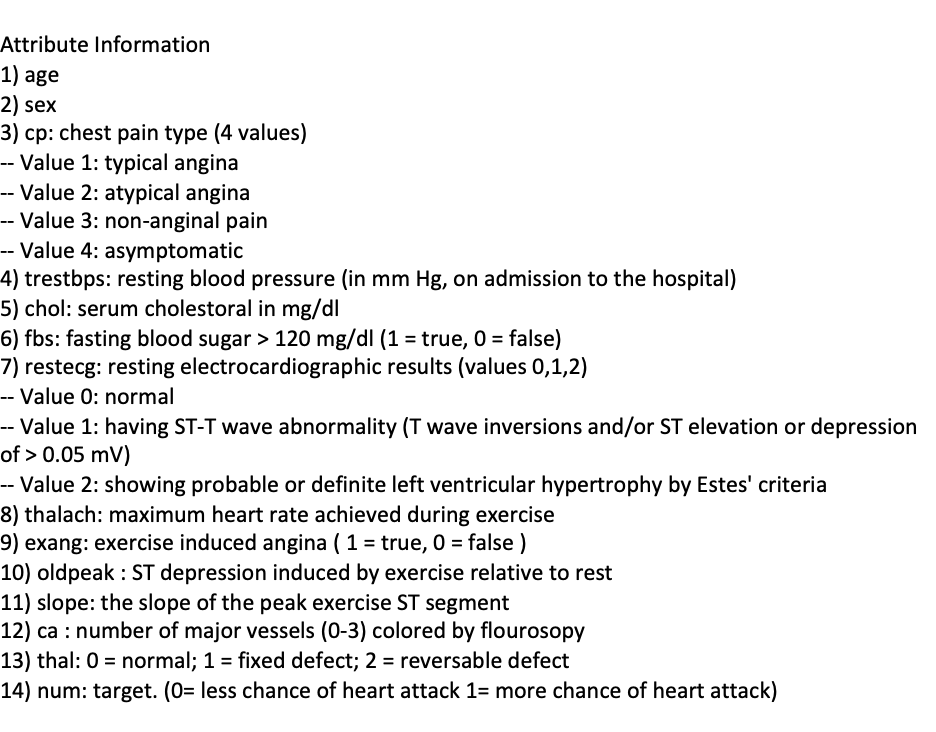

In [ ]:
#loading heart.csv into dataframe
df = pd.read_csv("/content/sample_data/heart.csv")

In [ ]:
df.info()

In [ ]:
df.describe(include = "all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.head()

In [ ]:
#Pairwise correlation in the data
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## **Step Two:** Data Preprocessing

1. NAN values
2. Proportion age & people w/ heart attack (column graph)
3. Proportion sex & people w/ heart attack
4. Number of cardiac arrest in the dataset


In [ ]:
# 1- No null values
df.notnull()

In [ ]:
!pip install -U pandasql

In [ ]:
from pandasql import sqldf
#Helper function to avoid running globals/locals each time
mysql = lambda q: sqldf(q, globals())

In [ ]:
import seaborn as sns

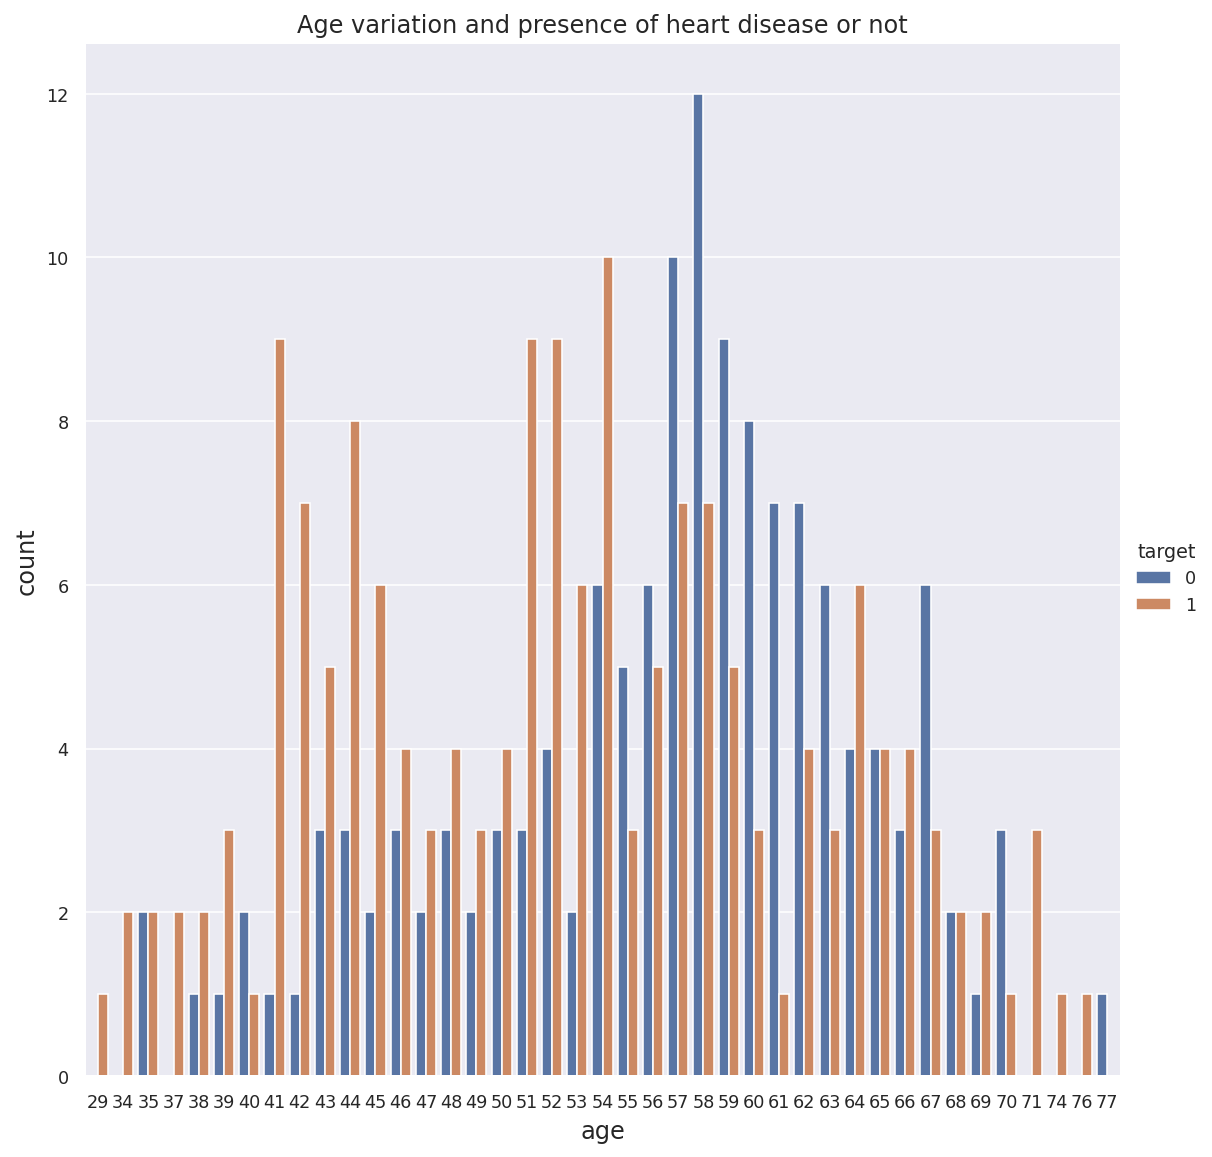

In [ ]:
#2- 
#Taken from: https://github.com/ShubhankarRawat/Heart-Disease-Prediction/blob/master/heart_code.py
#sns.set_context("paper", rc = {"font.size": 12.0,"axes.titlesize": 12.0,"axes.labelsize": 12.0,'xtick.major.width': 0.8}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique(), height = 8)
plt.title('Age variation and risk of heart disease or not')
plt.show()

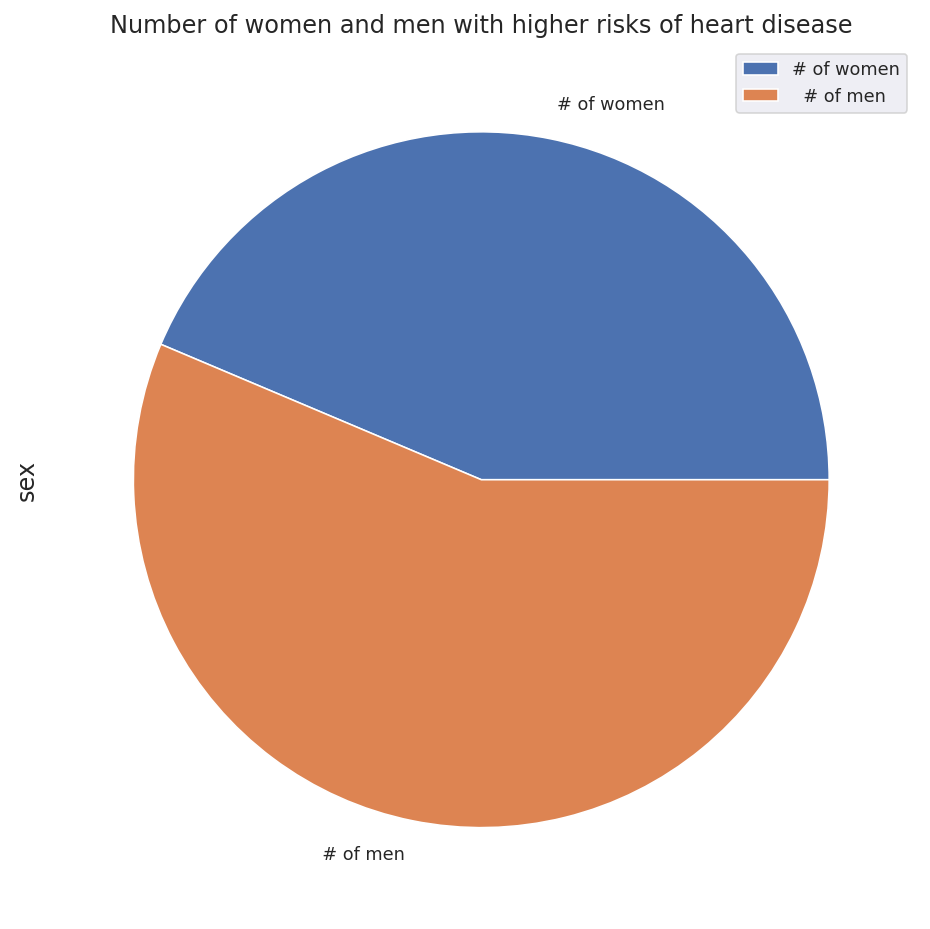

In [ ]:
#3- 
query_sex = """
SELECT target, sex
FROM df
WHERE target = 1

"""
sick_df = mysql(query_sex)
sick_df
sick_df['sex'] = sick_df['sex'].value_counts()
sick_df = sick_df.dropna()
sick_df
#dataframe.groupby(['Name']).sum() OR df['sex'].value_counts().plot.pie...
sex_hist = sick_df.plot(kind = 'pie', y='sex', labels = ['# of women', '  # of men'], title = 'Number of women and men with higher risks of heart disease',figsize = (12,8))

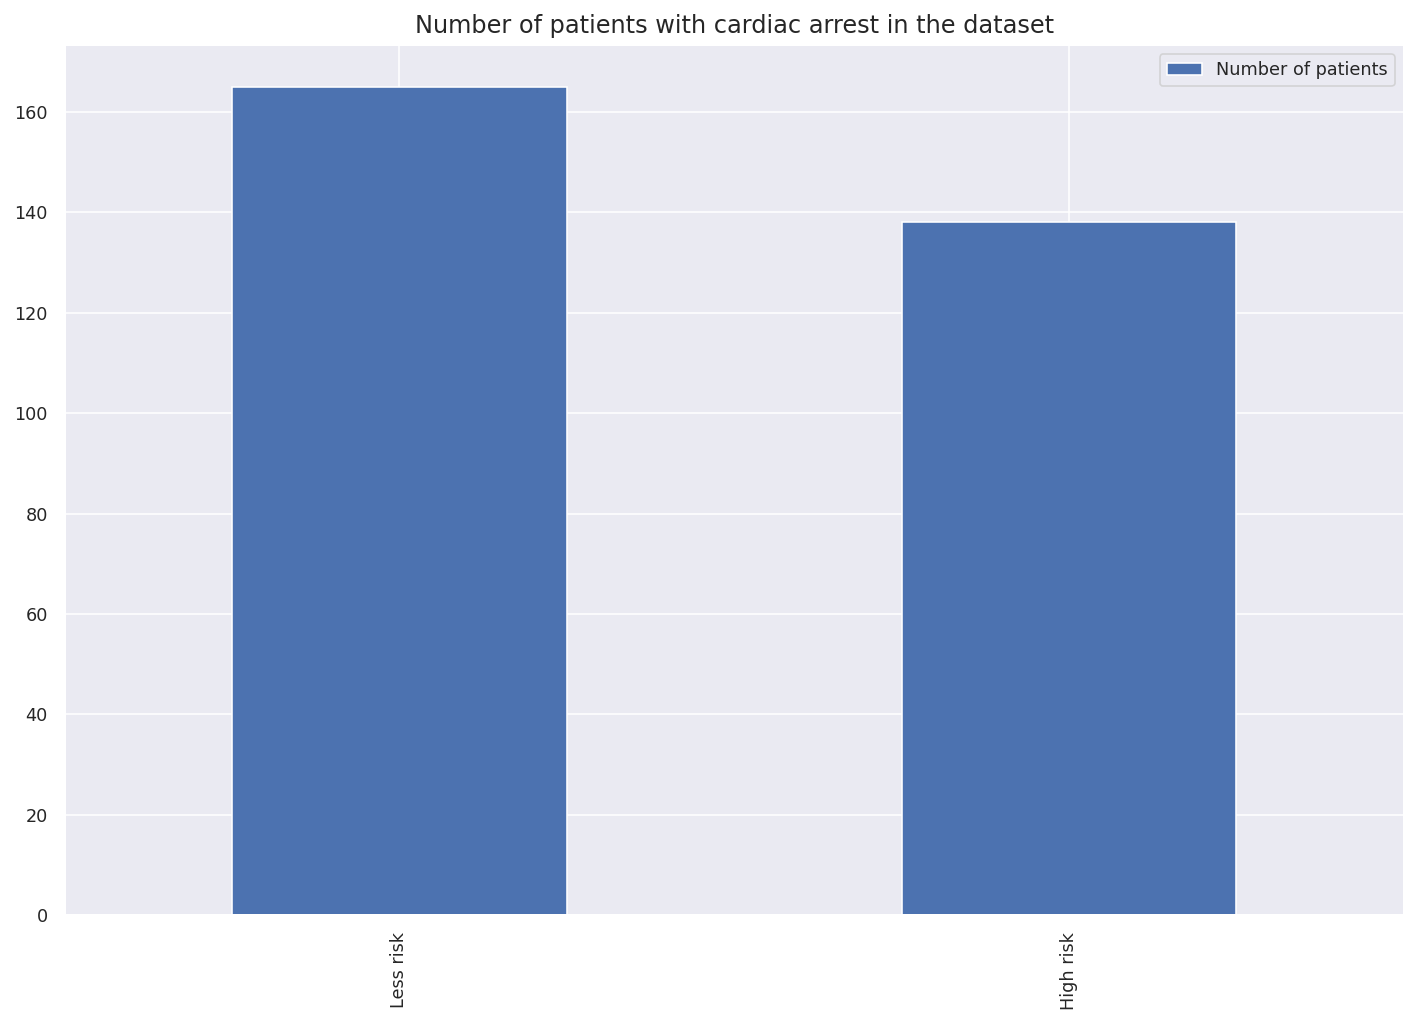

In [ ]:
#Number of cardiac arrest in the dataset
cardia_pos = df['target'].value_counts()
cardia_pos = cardia_pos.to_frame()
cardia_pos = cardia_pos.rename(index = {0: "High risk", 1: "Less risk"}, columns ={"target" : "Number of patients"})
cardia_pos
cardiac_plot = cardia_pos.plot(kind = 'bar', figsize = (12,8), title = 'Number of patients with cardiac arrest in the dataset')



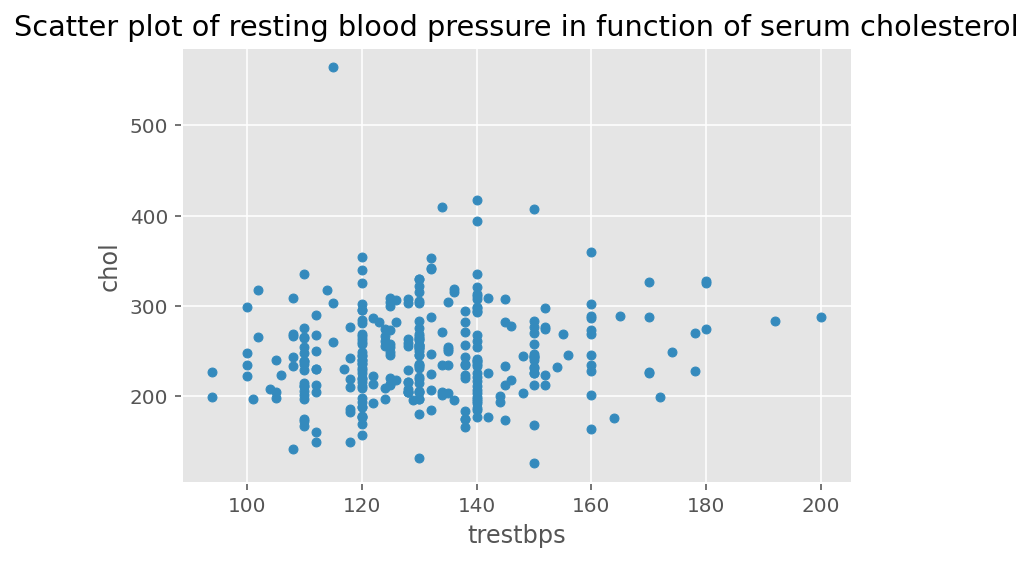

In [ ]:
df.plot(kind = 'scatter', x = 'trestbps', y ='chol')
plt.title('Scatter plot of resting blood pressure in function of serum cholesterol')
plt.show()

## **Step Three:** Feature Selection, Feature Learning

In [ ]:
#Defining input and targets
target = df['target']
inputs = df.drop('target', axis = 1, inplace = False)

#Standardize the data to be used by the model
#RobustScaler remove outliers & scale
scaler = preprocessing.RobustScaler()
colTransfo = ColumnTransformer([
                                ('Normalized', scaler, ['trestbps', 'chol', 'thalach'])
                                ], remainder = 'passthrough')
colTransfo.fit_transform(inputs)

#Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

In [ ]:
#Create a model object
model_lr = LogisticRegression(max_iter=1000)

#Train our model
model_lr.fit(x_train, y_train)

#Evaluate the model 
y_hat = model_lr.predict(x_test)


## **Step Four:** Model Evaluation

In [ ]:
print(y_hat)

In [ ]:
print(y_test)

In [ ]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
print(conf_matrix)

#classification report
print(classification_report(y_test,y_hat))

#Weighted: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)
f1_score = f1_score(list(y_test), y_hat, average = 'weighted')
print(f' The f1 score is {f1_score}')

[[24  4]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.89      0.97      0.93        33

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61

 The f1 score is 0.9174948560362565


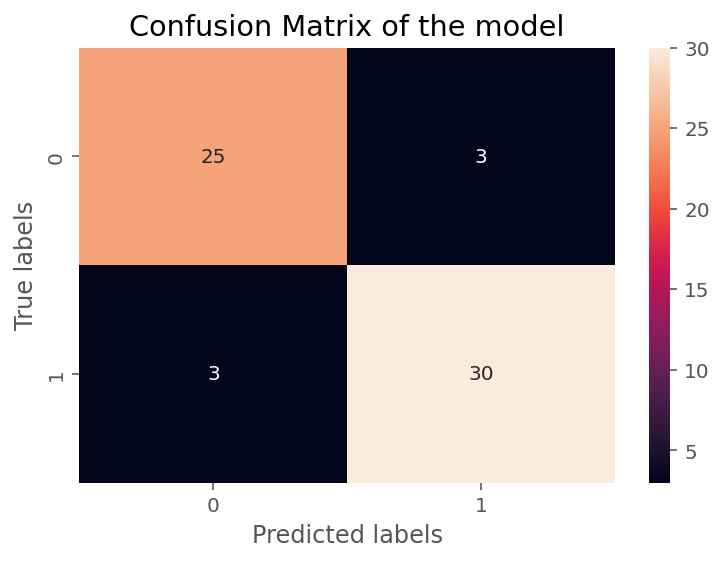

In [ ]:
#Print pretty confusion matrix
fig = plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax=fig) 
# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels') 
fig.set_title('Confusion Matrix of the model') 
plt.show()

In [ ]:
#Cross-validation score using k_fold
scores_kfold = cross_val_score(model_lr, inputs,target, cv = 5)
print(scores_kfold.mean())
print(scores_kfold.std())

0.8315300546448088
0.04899649918235962


In [ ]:
# Get importance coefficient for each feature
importance = model_lr.coef_
coefs_dict = dict(zip(inputs.columns, importance.flatten()))
print(coefs_dict)
max_key = max(coefs_dict, key=coefs_dict.get)
#cp : chest pain type
print(f'Max feature coef: {max_key}')
	

{'age': -0.006182637734404267, 'sex': -1.3445880545816549, 'cp': 0.7194399502403197, 'trestbps': -0.015102990075682669, 'chol': -0.006165080671949303, 'fbs': 0.005033193397772823, 'restecg': 0.47697592424831514, 'thalach': 0.021131021761521058, 'exang': -0.6733870959878904, 'oldpeak': -0.6298834678742796, 'slope': 0.40129426385625866, 'ca': -0.6243593294151126, 'thal': -0.7619461439152732}
Max feature coef: cp


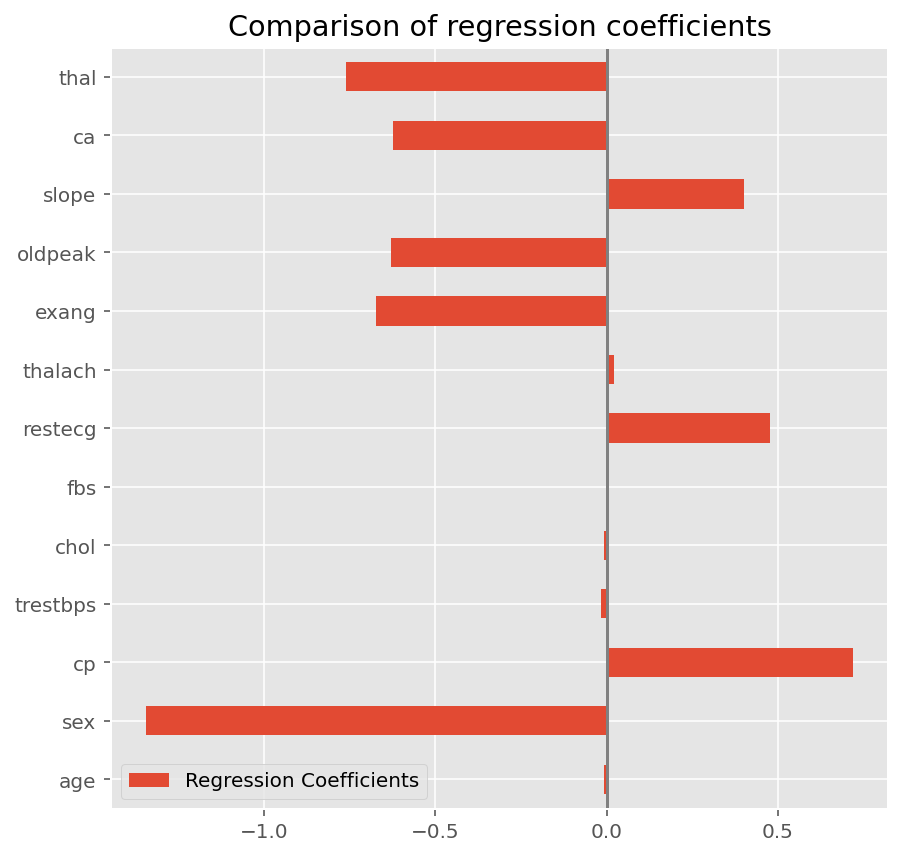

In [ ]:
#Plot of regression coefficiennts
df_coefs =pd.DataFrame(list(coefs_dict.items()))
df_coefs.index = inputs.columns
df_coefs = df_coefs.drop(df_coefs.columns[[0]],axis =1)
df_coefs.rename( columns = {1:'Regression Coefficients'}, inplace = True)
df_coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Comparison of regression coefficients")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


In [ ]:
#Using k-fold cross validation 
#All data gets in test (once) & training  (multiple times)
from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True)


In [ ]:
scores = cross_val_score(model_lr, inputs,target, cv = skf)
print(scores)
print(scores.mean(),scores.std())

[0.86885246 0.81967213 0.85245902 0.75       0.86666667]
0.8315300546448088 0.044392172671269395


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


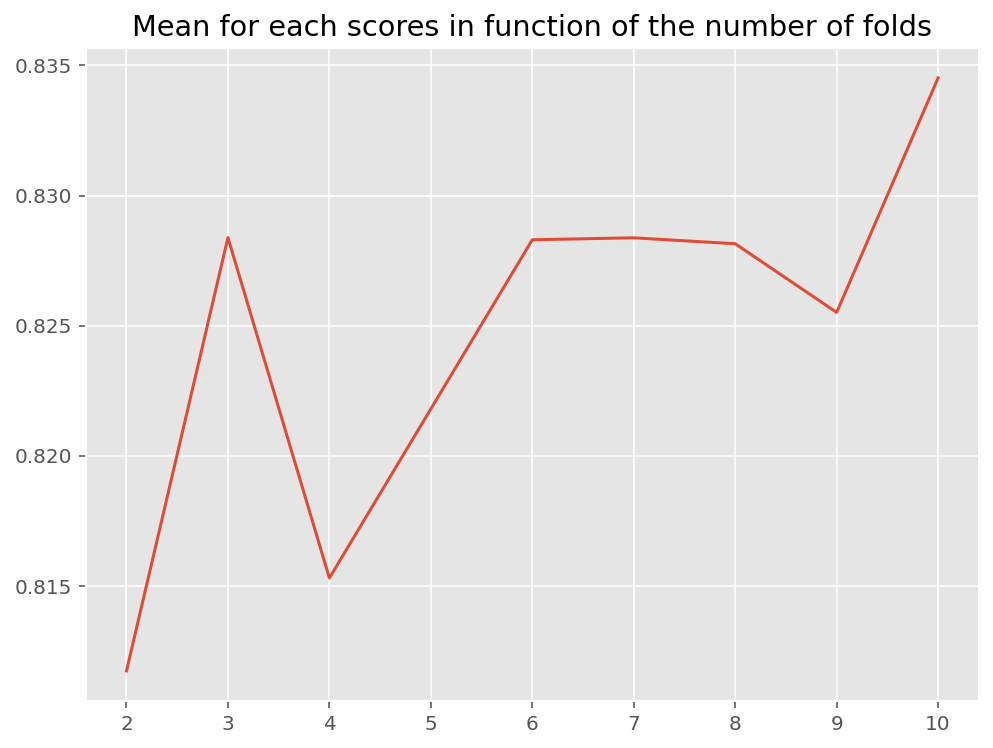

In [ ]:
#Parameter search: cross-validator generator
splits = [2,3,4,5,6,7,8,9,10]
scores_mean = []
for split in splits:
  skf = StratifiedKFold(n_splits = split, shuffle = True)
  scores = cross_val_score(model_lr, inputs,target, cv = skf)
  scores_mean.append(scores.mean())

fig = plt.figure(figsize = [8,6])
plt.plot(range(len(splits)),scores_mean)
fig.axes[0].set_xticks(range(len(splits)))
fig.axes[0].set_xticklabels(splits)
plt.title('Mean for each scores in function of the number of folds')
plt.show()



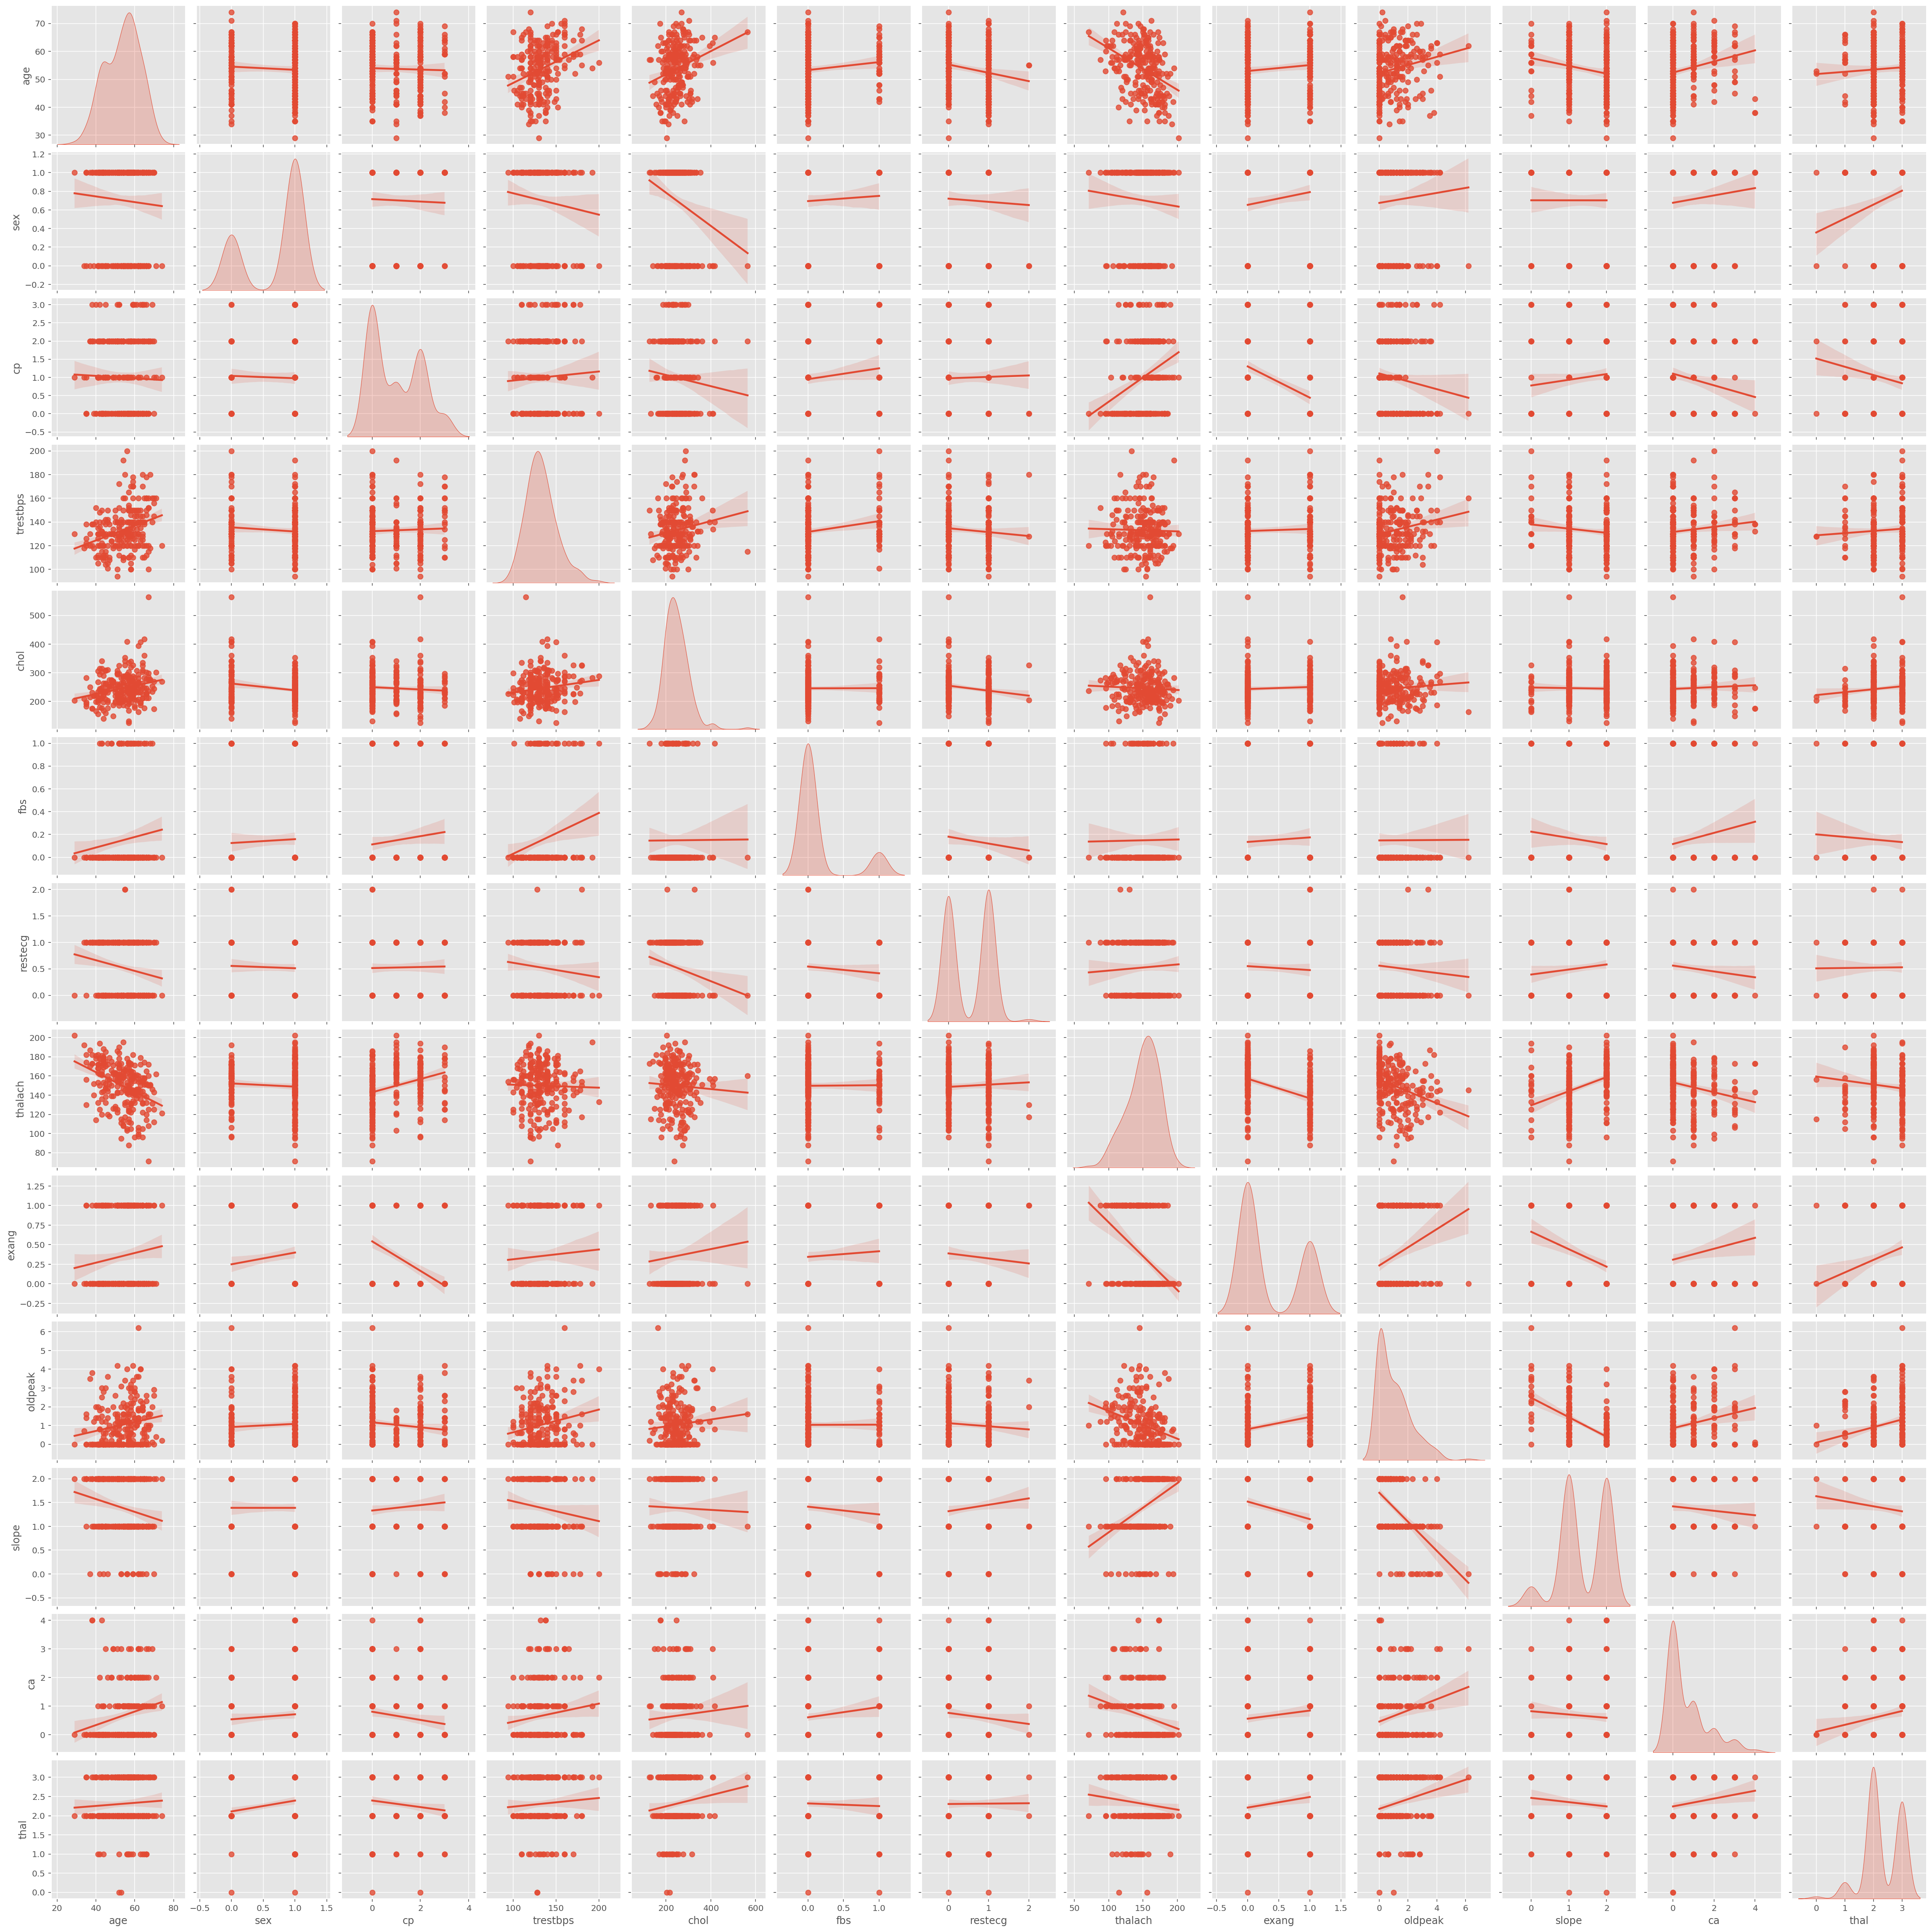

In [ ]:
_ = sns.pairplot(x_train, kind="reg", diag_kind="kde")